<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/CadenasuministroU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Selecciona una variable dependiente, elimina valores nulos y realiza el encoding.

In [33]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/smart_logistics_dataset.csv")
df.dropna(inplace = True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Timestamp: Fecha y hora en que se registraron los datos, representando una actividad logística.

In [34]:
df.drop(columns = ["Timestamp"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Asset_ID: Identificador único de los activos logísticos (por ejemplo, camiones).

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Asset_ID)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1185.003921,131.667102,0.635796,0.766885
Residual,727.0,150554.551031,207.090166,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
 Truck_1 Truck_10  -3.2128 0.9518 -11.0087   4.583  False
 Truck_1  Truck_2  -1.3116    1.0  -9.1835  6.5602  False
 Truck_1  Truck_3    1.212    1.0  -6.7138  9.1377  False
 Truck_1  Truck_4  -0.8988    1.0  -8.4764  6.6788  False
 Truck_1  Truck_5  -0.9696    1.0  -8.7655  6.8263  False
 Truck_1  Truck_6   0.6318    1.0  -7.1887  8.4524  False
 Truck_1  Truck_7   1.0687    1.0  -6.8032  8.9405  False
 Truck_1  Truck_8  -1.3324 0.9999  -8.7337  6.0688  False
 Truck_1  Truck_9  -0.0337    1.0  -8.1391  8.0716  False
Truck_10  Truck_2   1.9012 0.9986  -5.6858  9.4882  False
Truck_10  Truck_3   4.4248 0.7111  -3.2181 12.0677  False
Truck_10  Truck_4    2.314 0.9917  -4.9672  9.5952  False
Truck_10  Truck_5   2.2432 0.9948  -5.2648  9.7513  False
Truck_10  Truck_6   3.8447 0.8385  -3.6891 11.3784  False
Truck_10  Truc

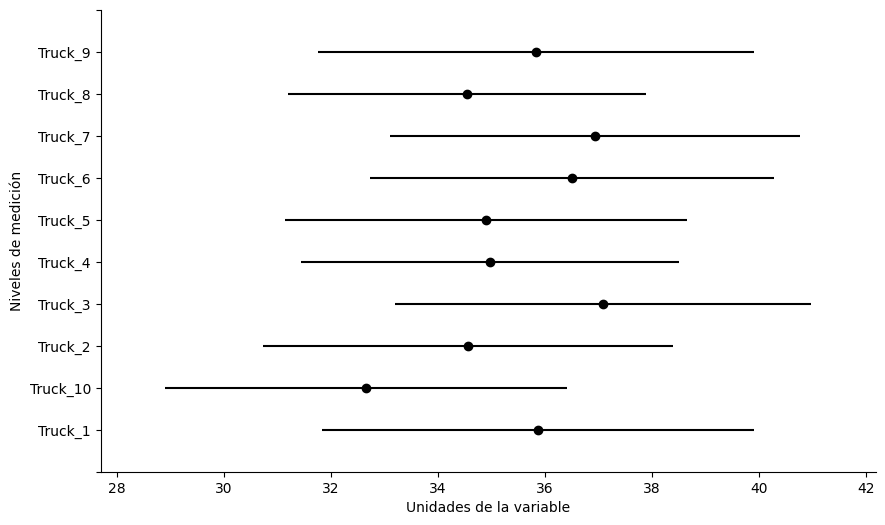

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Asset_ID'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [37]:
df.drop(columns = ["Asset_ID"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Latitude & Longitude: Coordenadas geográficas del activo para su rastreo y monitoreo.

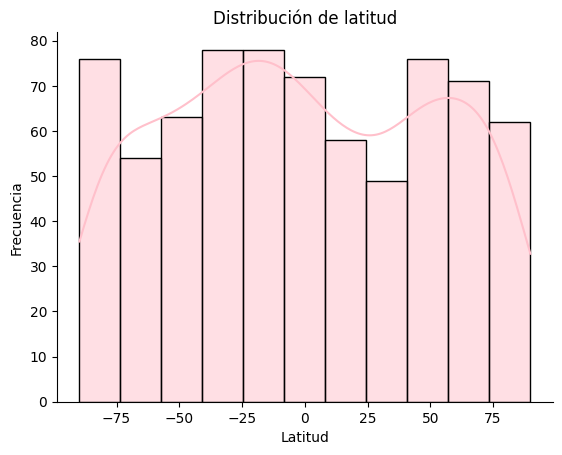

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'pink')

plt.xlabel('Latitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de latitud')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

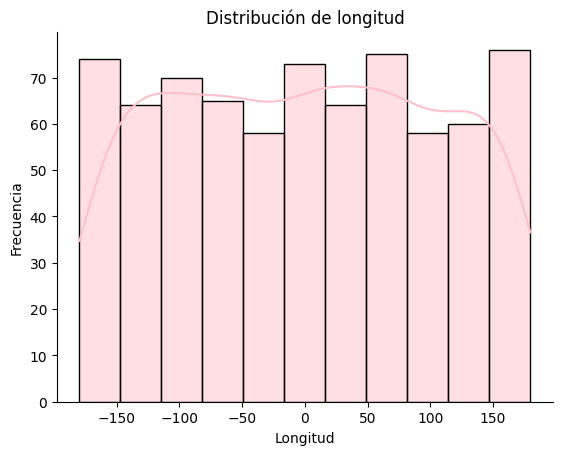

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'pink')

plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitud')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Inventory_Level: Nivel actual de inventario asociado al activo o envío.

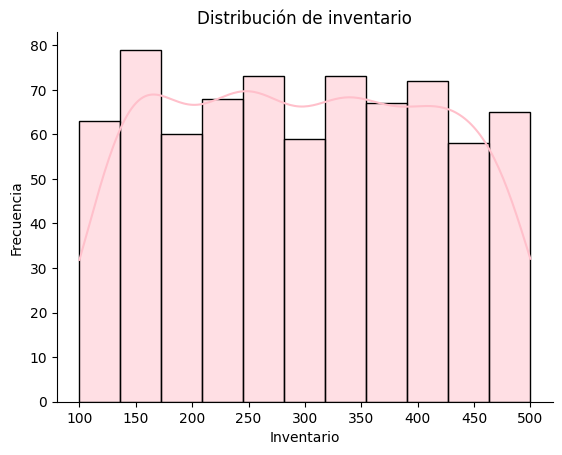

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'pink')

plt.xlabel('Inventario')
plt.ylabel('Frecuencia')
plt.title('Distribución de inventario')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Shipment_Status: Estado del envío (por ejemplo, En tránsito, Entregado, Retrasado).

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Shipment_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,208.098709,104.049355,0.504002,0.604317
Residual,734.0,151531.456243,206.446126,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
  Delayed  Delivered   1.2094 0.6067 -1.7702 4.1891  False
  Delayed In Transit   0.9661 0.7424 -2.1183 4.0505  False
Delivered In Transit  -0.2433 0.9813 -3.3305 2.8439  False
----------------------------------------------------------


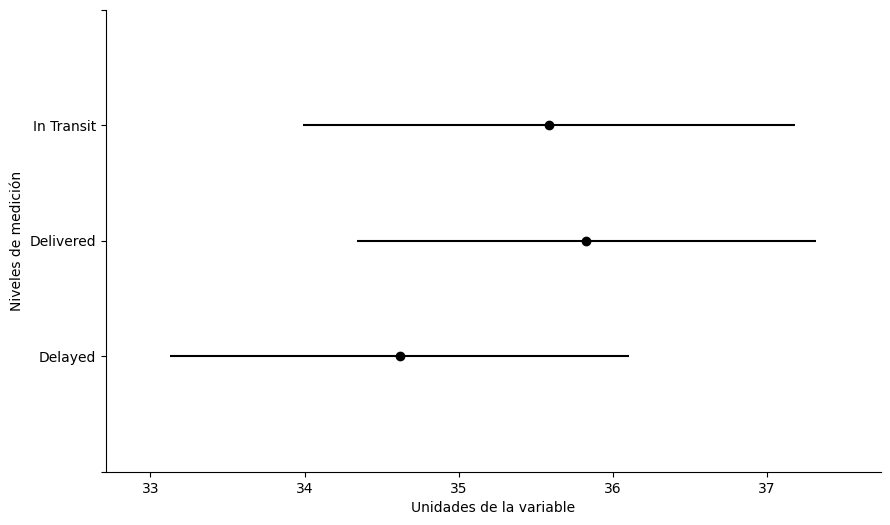

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Shipment_Status'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [43]:
df.drop(columns = ["Shipment_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Temperature: Temperatura registrada en el momento del envío o transporte.

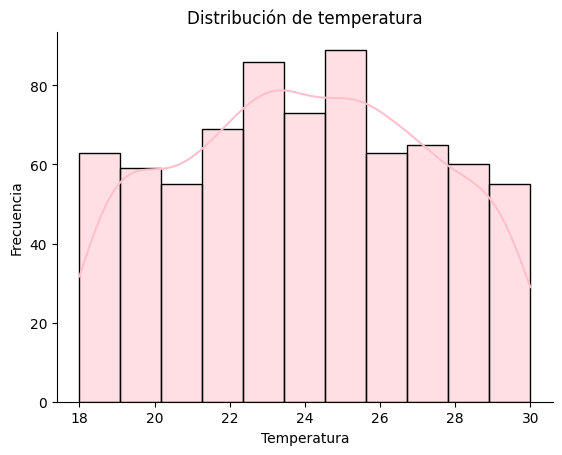

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Temperature'], kde = True, color = 'pink')

plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperatura')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Humidity: Nivel de humedad al momento del registro.

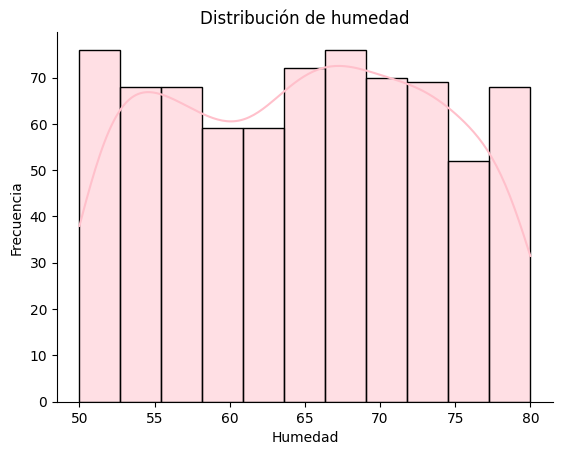

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Humidity'], kde = True, color = 'pink')

plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de humedad')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Traffic_Status: Condición actual del tráfico (por ejemplo, Despejado, Pesado, Desvío).

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Traffic_Status)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,168.452231,84.226116,0.407874,0.665213
Residual,734.0,151571.102721,206.500140,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Clear Detour  -0.7226 0.8428 -3.7687 2.3234  False
 Clear  Heavy  -1.1585 0.6442 -4.2015 1.8844  False
Detour  Heavy  -0.4359 0.9396  -3.482 2.6101  False
---------------------------------------------------


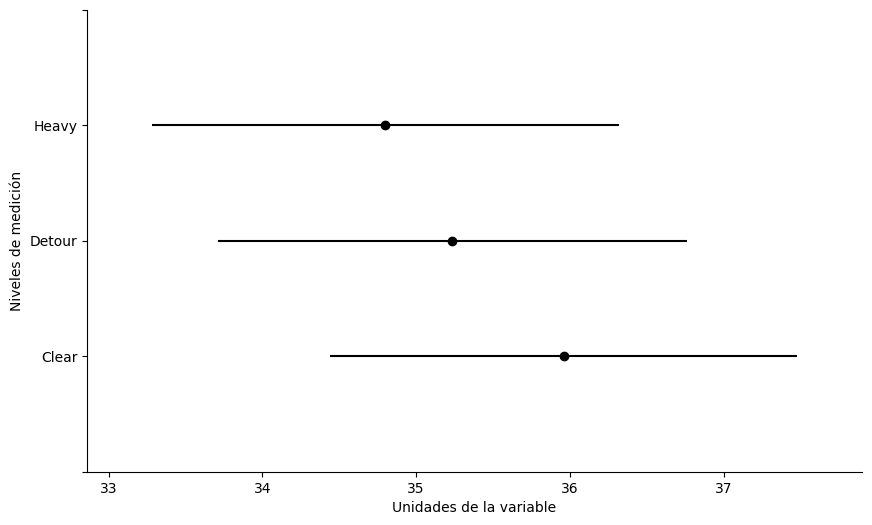

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Traffic_Status'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [48]:
df.drop(columns = ["Traffic_Status"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,Weather,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,Traffic,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,Traffic,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,Mechanical Failure,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,Weather,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,Traffic,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,Weather,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,Weather,83.7,272,0


Waiting_Time: Tiempo de espera durante el proceso logístico (en minutos).

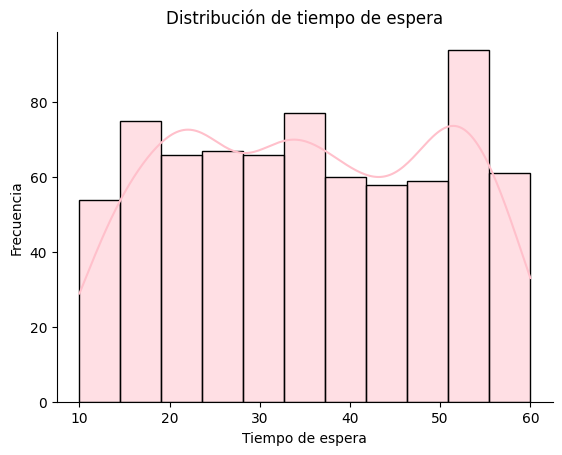

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'pink')

plt.xlabel('Tiempo de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de tiempo de espera')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

User_Transaction_Amount: Monto monetario asociado con las transacciones del usuario.

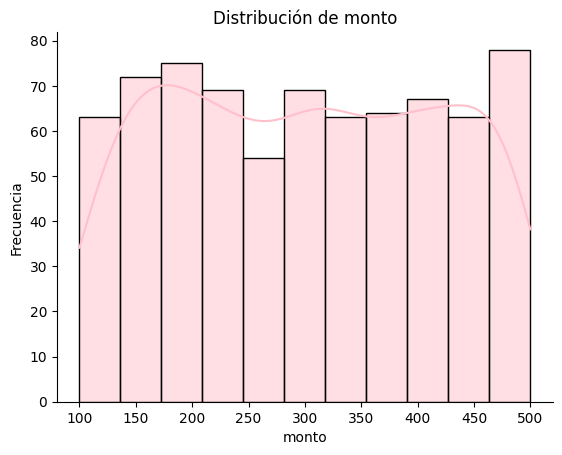

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'pink')

plt.xlabel('monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de monto')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

User_Purchase_Frequency: Frecuencia de compras realizadas por el usuario.

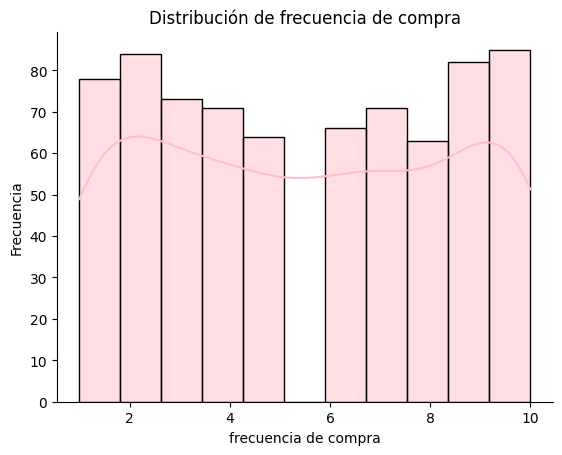

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Purchase_Frequency'], kde = True, color = 'pink')

plt.xlabel('frecuencia de compra')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia de compra')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Logistics_Delay_Reason: Motivo de cualquier retraso en el proceso logístico (por ejemplo, Clima, Falla mecánica).

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Logistics_Delay_Reason)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,430.598291,215.299145,1.044417,0.352419
Residual,734.0,151308.956662,206.142993,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
      group1        group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Mechanical Failure Traffic  -0.0205 0.9999 -3.1312 3.0902  False
Mechanical Failure Weather  -1.6005 0.4272 -4.6199  1.419  False
           Traffic Weather    -1.58 0.4348 -4.5926 1.4327  False
----------------------------------------------------------------


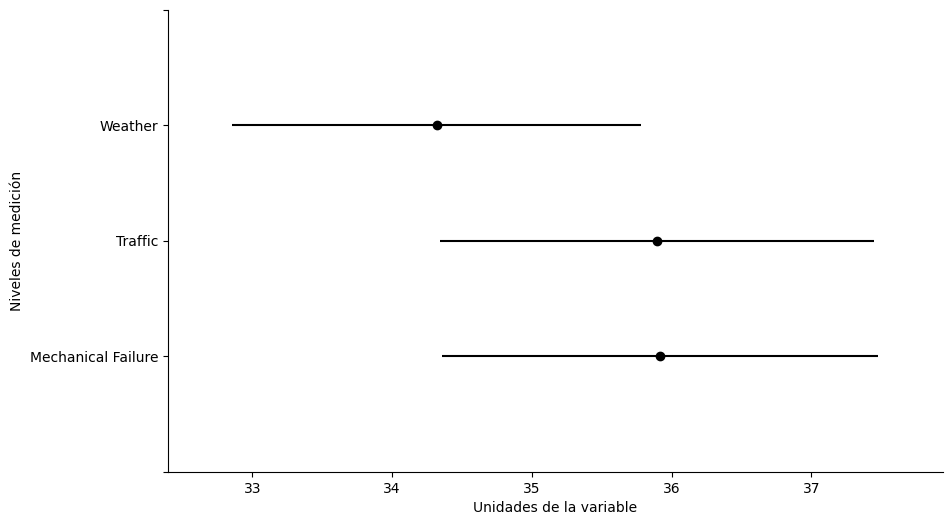

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Logistics_Delay_Reason'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [54]:
df.drop(columns = ["Logistics_Delay_Reason"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,1
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,1
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253,0
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224,0
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221,1
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168,0
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213,1
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272,0


Asset_Utilization: Porcentaje de utilización del activo, indicando cuán eficientemente se está usando.

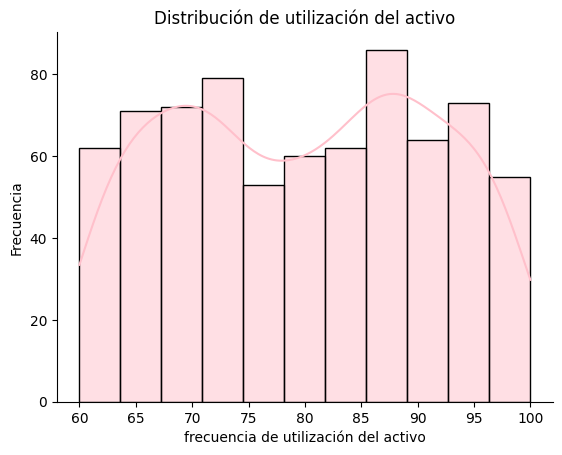

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'pink')

plt.xlabel('frecuencia de utilización del activo')
plt.ylabel('Frecuencia')
plt.title('Distribución de utilización del activo')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Demand_Forecast: Demanda prevista para los servicios logísticos en el próximo período.

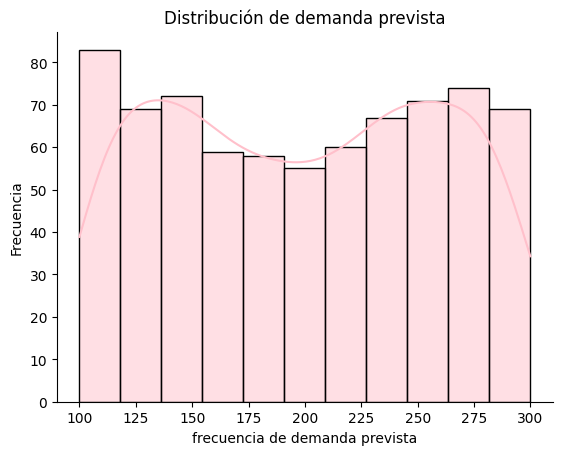

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Demand_Forecast'], kde = True, color = 'pink')

plt.xlabel('frecuencia de demanda prevista')
plt.ylabel('Frecuencia')
plt.title('Distribución de demanda prevista')

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
#No tiene valores atipicos

Logistics_Delay (Objetivo): Variable binaria que indica si ocurrió un retraso logístico (1 para retraso, 0 para sin retraso).

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Waiting_Time~ C(Logistics_Delay)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

#H0: No hay diferencia entre grupos
#No rechazamos H0

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,532.543800,532.543800,2.588635,0.108062
Residual,735.0,151207.011153,205.723825,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -1.7163 0.1081 -3.8105 0.3779  False
---------------------------------------------------


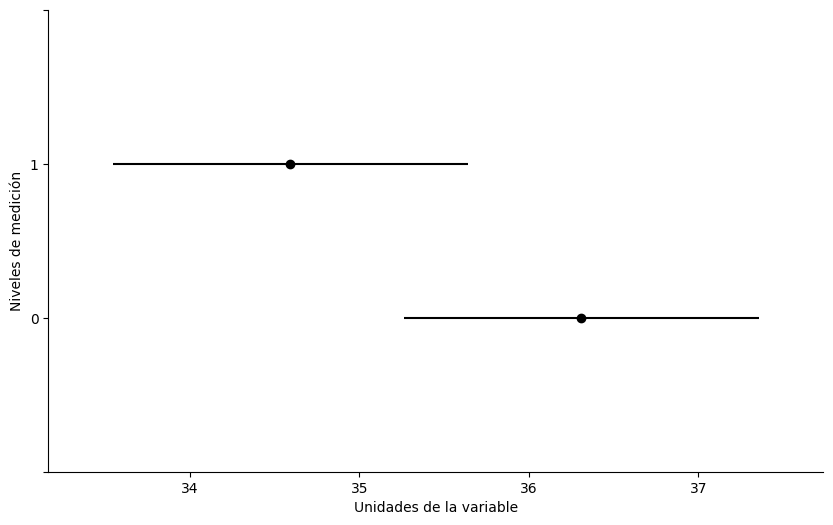

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Waiting_Time'], groups = df['Logistics_Delay'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = "Niveles de medición", xlabel = "Unidades de la variable")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.title("")
print(tukey)

In [59]:
df.drop(columns = ["Logistics_Delay"], inplace = True)
df

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160
7,46.5643,-126.5348,222,23.3,64.2,30,459,9,73.8,253
9,54.1683,-135.2676,389,21.9,57.3,52,127,7,63.1,224
11,-25.2768,156.1262,234,29.7,63.6,13,406,10,85.5,238
...,...,...,...,...,...,...,...,...,...,...
993,46.9729,-36.5198,420,21.6,62.8,31,242,10,95.6,221
994,44.2477,175.0702,143,21.6,64.1,32,307,10,64.0,168
995,89.8701,73.6867,264,26.9,70.0,32,188,1,79.2,213
996,-10.4792,-177.1239,479,23.7,77.9,56,276,7,83.7,272


b) Obtén la matriz de correlación y realiza un mapa de calor.

<Axes: >

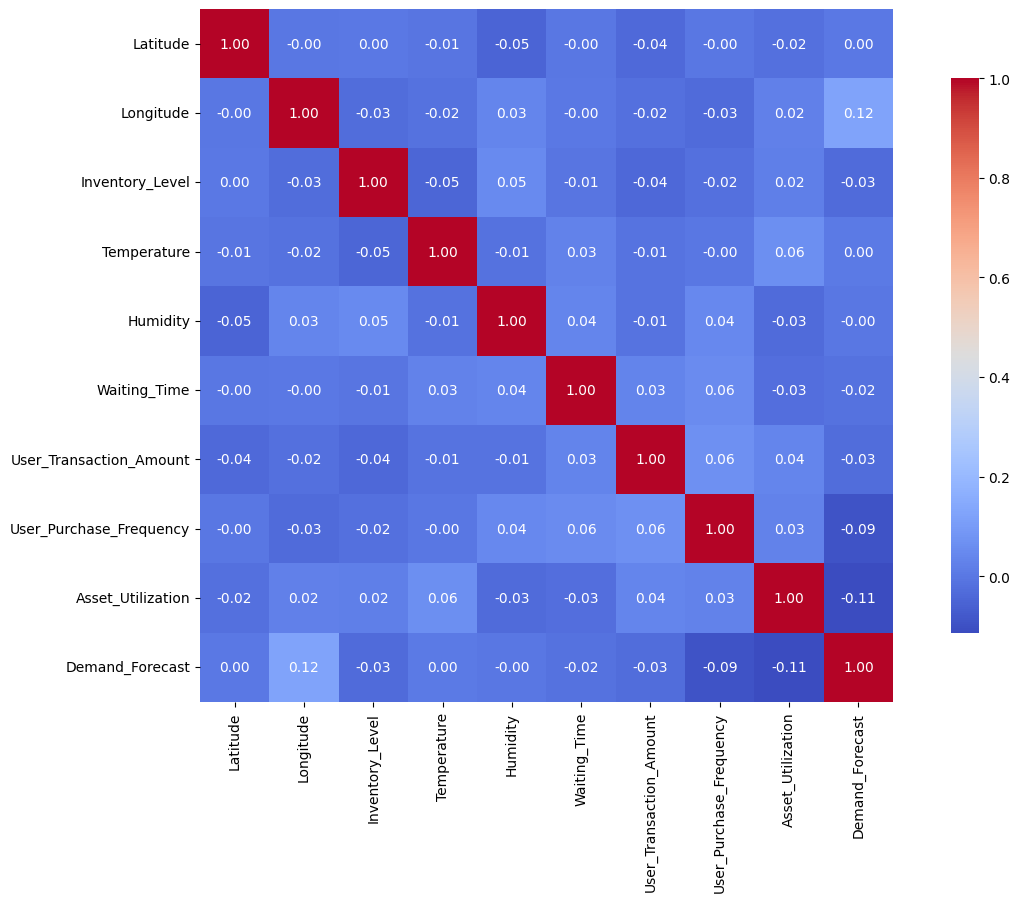

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {"shrink": 0.8})

c) Separa datos de entrenamiento y datos de prueba y entrena el modelo.

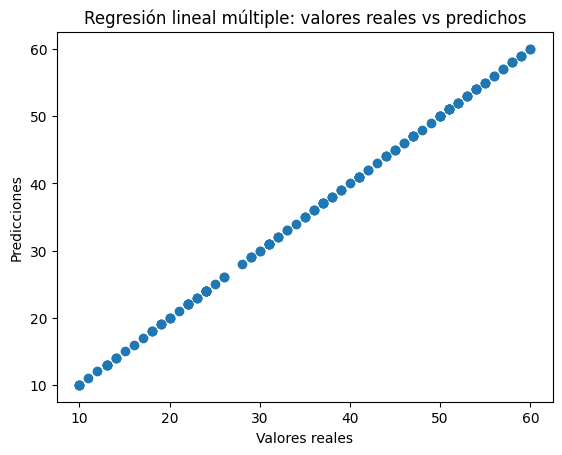

Coeficiente de determinación: 1.0000


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

X = df[["Latitude",	"Longitude",	"Inventory_Level",	"Temperature",	"Humidity",	"Waiting_Time",	"User_Transaction_Amount",
        	"Asset_Utilization",	"Demand_Forecast"]]
y = df["Waiting_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(y_train, X_train_constante).fit()

y_pred = modelo.predict(X_test_constante)

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal múltiple: valores reales vs predichos")
plt.show()

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación: {r2:.4f}")
#Entiendo que un coeficiente de 1.0 es muy bueno para ser verdad :(

d) Obtén las estadísticas que muestren el desempeño del modelo e interpreta los resultados.

In [70]:
b0, b1, b2, b3, b4, b5, b6, b7, b8, b9 = modelo.params

fun = lambda x1, x2, x3, x4, x5, x6, x7, x8: b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8
fun(59, 150, 50, 430, 23, 62, 30, 7)

62.000000000000064